# Contributors to this notebook

* Daniel Arribas-Bel [@darribas](http://twitter.com/darribas)
* Serge Rey http://sjrey.org
* Marynia Kolak

In [1]:
%matplotlib inline
import pysal as ps  # 1.5 or higher
import numpy as np  # 1.7 or higher
import pandas as pd # 0.10 or higher
from matplotlib.pyplot import *

In [2]:
import mpld3
from mpld3 import plugins, utils

# Exploratory Spatial Data Analysis (ESDA)

## Global spatial autocorrelation

Most spatial data are spatially autocorrelated:

* [First Law of Geography:](http://en.wikipedia.org/wiki/Tobler's_first_law_of_geography)

    *"Everything is related to everything else, but near things are more related than distant things"* - W. Tobler

* M. Goodchild: *"Only Hell is spatially random"*

### Positive spatial autocorrelation

In [24]:
yp = np.arange(25)
yp.shape = (5, 5)
yp

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [25]:
matshow(yp, cmap=cm.gray_r)
colorbar()

mpld3.display()

### Perfect negative spatial autocorrelation

In [26]:
yn = np.zeros((25,))
ids = range(0,25,2)
yn[ids] = 1
yn.shape = (5,5)

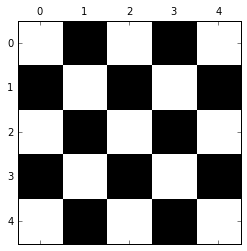

In [28]:
matshow(yn, cmap=cm.gray)


### Spatial randomness

In [29]:
yr = np.arange(25)
#Shuffle the data randomly
np.random.shuffle(yr)
yr.shape = (5, 5)
yr

array([[15,  3, 17, 11, 18],
       [ 6, 16, 10,  1, 12],
       [19, 13, 23,  8, 22],
       [ 0, 21,  2,  5,  9],
       [ 7, 14, 20,  4, 24]])

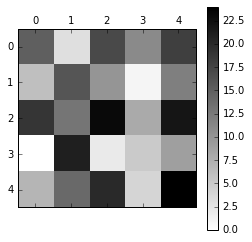

In [30]:
matshow(yr, cmap=cm.gray_r)
colorbar()

### Moran's I

This is the most commonly used statistic to test spatial autocorrelation (randomness rather) in continuous data.

In [31]:
w = ps.lat2W(5, 5)

In [32]:
mr = ps.Moran(yr.flatten(), w)

In [33]:
mr.I

-0.33160256410256411

In [34]:
mr.p_norm

0.05362494732268519

In [35]:
mr.p_sim

0.034000000000000002

In [36]:
# Simulated random values
mr.sim

array([  1.50384615e-01,  -9.56410256e-02,  -5.69871795e-02,
        -1.67051282e-01,   5.63461538e-02,   1.55000000e-01,
        -7.37179487e-03,  -2.24294872e-01,  -6.53846154e-03,
        -1.44038462e-01,   4.17948718e-02,  -2.79487179e-02,
         8.84615385e-03,  -1.61602564e-01,   5.85897436e-02,
        -8.52564103e-03,  -4.27500000e-01,   8.41025641e-02,
        -3.30769231e-02,  -1.11153846e-01,   9.93589744e-03,
         1.81730769e-01,  -1.13653846e-01,  -6.22435897e-02,
        -1.21410256e-01,   4.76282051e-02,  -1.65512821e-01,
        -1.87820513e-02,   1.41346154e-01,  -1.51858974e-01,
         3.00641026e-02,   2.46217949e-01,  -3.82179487e-01,
        -1.09102564e-01,  -5.87820513e-02,   1.37435897e-01,
         1.51153846e-01,   5.25641026e-02,  -3.17948718e-02,
        -1.25641026e-01,   8.30128205e-02,  -1.78846154e-01,
        -3.96153846e-02,   3.02179487e-01,  -8.64102564e-02,
        -1.11923077e-01,  -1.47564103e-01,  -1.42884615e-01,
        -7.50641026e-02,

We can plot the empirical inference easily using `pandas` and a bit of `matplotlib`:

In [37]:
srv = pd.Series(mr.sim)
f = figure()
ax = f.add_subplot(111)
srv.plot(kind='kde', ax=ax)
axvline(mr.I, color='r')
xlabel('I')
ylabel('f(I)')
title('Empirical distribution and value of $Ir$')

mpld3.display()
##BUG: Display pushes the "I" of title off


Moran's I value is: 0.8400


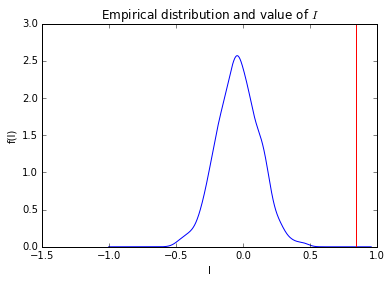

In [43]:
mp = ps.Moran(yp.flatten(), w)
srv = pd.Series(mp.sim)
f = figure()
ax = f.add_subplot(111)
srv.plot(kind='kde', ax=ax)
axvline(mp.I, color='r')
xlabel('I')
ylabel('f(I)')
title('Empirical distribution and value of $I$')
print("")
print("Moran's I value is: %.4f"%mp.I)

#mpld3.display() 
##BUG: Display pushes the "I" of title off


Moran's I value is: -1.0000


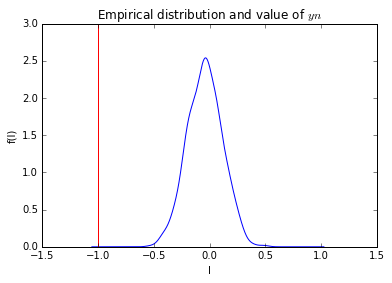

In [45]:
mn = ps.Moran(yn.flatten(), w)
srv = pd.Series(mn.sim)
f = figure()
ax = f.add_subplot(111)
srv.plot(kind='kde', ax=ax)
axvline(mn.I, color='r')
xlabel('I')
ylabel('f(I)')
title('Empirical distribution and value of $yn$')
print("")
print("Moran's I value is: %.4f"%mn.I)

#mpld3.display() 
##BUG: Display pushes the special characters in title off

Now let's try Moran's I on the Amsterdam checkin data. Note that because we have already created the weights (see the notebook `PySAL_weights` in the same folder), we can simply load them.

In [46]:
w = ps.open('data/adam.gal').read()
w.transform = 'R'
w

Island id:  ['27']


Let's try it on the total volume of checkins by neighborhood:

In [47]:
total = np.array(ps.open('data/amsterdam_hoods.dbf').by_col('total'))


Moran's I value is: 0.3748


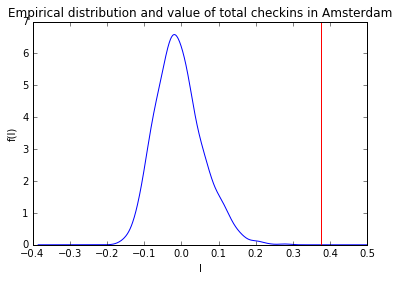

In [48]:
mi_adam = ps.Moran(total, w)
srv = pd.Series(mi_adam.sim)
f = figure()
ax = f.add_subplot(111)
srv.plot(kind='kde', ax=ax)
axvline(mi_adam.I, color='r')
xlabel('I')
ylabel('f(I)')
title('Empirical distribution and value of total checkins in Amsterdam')
print("")
print("Moran's I value is: %.4f"%mi_adam.I)

### Scatter plot

One way to graphically display and understand Moran's I is through the so called `scatter plot`, that represents the values of `y` against their spatially lagged values (`wy`). This is straightforward to plot with `matplotlib`. An interesting addition is to include a fitted line, whose slope corresponds to Moran's I.

/Users/Masia/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  warnings.warn(depdoc, DeprecationWarning)
/Users/Masia/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  warnings.warn(depdoc, DeprecationWarning)
/Users/Masia/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:99: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  warnings.warn(depdoc, DeprecationWarning)


ValueError: plugins.connect: first argument must be a figure

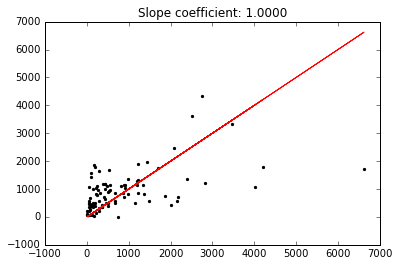

In [68]:
w_total = ps.lag_spatial(w, total)
scatter(total, w_total, marker='.', s=20, alpha=1, color='k')
fit = ps.spreg.OLS(total[:, None], total[:, None])
plot(total[:, None], fit.predy, color='r')
title("Slope coefficient: %.4f"%fit.betas[1])

##########################################################
## Need to dither the data and clean up figure, point input
##########################################################

plugins.connect(figure, plugins.LinkedBrush(w_total))
#mpld3.display() 


In [21]:
mi_adam.I

0.37484886591924182

#### On your own

Try to explore the change of spatial autocorrelation in the volume of checkins over the different hours of the day.

## Local spatial autocorrelation

[Anselin, 1995. *Local Indicators of Spatial Association*](http://onlinelibrary.wiley.com/doi/10.1111/j.1538-4632.1995.tb00338.x/abstract)

In [22]:
from pysal.contrib.viz import mapping as viz

In [23]:
lisa_total = ps.Moran_Local(total, w)

In [24]:
lisa_total.Is

array([  6.00928348e+00,   4.61049219e+00,   4.21625690e+00,
         5.85778358e+00,   1.85434314e+00,   6.28629394e-01,
         7.82059246e-01,   2.91992050e+00,   3.79614269e-01,
         9.00362375e-02,  -3.15884500e-02,  -3.87707864e-01,
        -1.46755548e-01,   2.16206112e-02,   1.51768095e-01,
         5.85137017e-02,  -3.55651247e-03,  -2.00495239e-02,
         2.53094637e-01,   2.65744884e-02,  -3.85914527e-01,
         1.07817032e-01,  -2.00100954e-01,  -1.28315718e-01,
        -1.24848021e-01,  -2.85310661e-01,  -1.20589376e-01,
        -0.00000000e+00,   3.46222202e-01,  -1.81243281e-01,
         3.83573127e-02,   2.27087403e-01,   9.07483942e-02,
         2.19138381e-01,   2.63422429e-01,   2.56582190e-01,
         2.01213118e-01,  -4.74572686e-01,  -5.88628830e-01,
         5.08278164e-01,   4.97589107e-01,   4.93393442e-01,
         3.06105138e-01,   2.22173819e-01,   4.87447098e-01,
         4.91732036e-01,   4.35930530e-01,   3.49562356e-01,
         1.14567123e-01,

In [25]:
lisa_total.p_sim

array([ 0.002,  0.001,  0.001,  0.001,  0.001,  0.007,  0.085,  0.005,
        0.009,  0.121,  0.321,  0.181,  0.226,  0.362,  0.211,  0.367,
        0.444,  0.381,  0.203,  0.327,  0.056,  0.145,  0.064,  0.205,
        0.256,  0.287,  0.292,  0.001,  0.225,  0.258,  0.228,  0.215,
        0.23 ,  0.039,  0.127,  0.066,  0.18 ,  0.068,  0.022,  0.011,
        0.056,  0.001,  0.16 ,  0.304,  0.007,  0.002,  0.001,  0.043,
        0.164,  0.246,  0.277,  0.28 ,  0.453,  0.067,  0.002,  0.011,
        0.017,  0.281,  0.165,  0.135,  0.163,  0.298,  0.113,  0.376,
        0.366,  0.234,  0.136,  0.422,  0.269,  0.198,  0.463,  0.303,
        0.092,  0.343,  0.179,  0.17 ,  0.493,  0.319,  0.152,  0.392,
        0.029,  0.231,  0.284,  0.482,  0.411,  0.351,  0.119,  0.476,
        0.187,  0.078,  0.407,  0.283,  0.255,  0.198,  0.469,  0.247])

C:\Anaconda\envs\py3\lib\site-packages\matplotlib\artist.py:210: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)
C:\Anaconda\envs\py3\lib\site-packages\matplotlib\artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

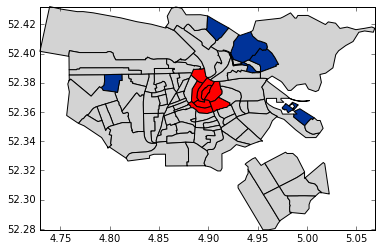

In [26]:
hoods = "data/amsterdam_hoods.shp"
viz.plot_lisa_cluster(hoods, lisa_total, title="LISA Cluster Map")